📌  **상단의 '파일-드라이브에 사본 저장' 해서 본인 드라이브에 저장된 사본 이용해서 실습 해주세요!!**

📌 week13 복습습과제는 **NLG 실습**으로 구성되어 있습니다.

📌 위키독스의 딥러닝을 이용한 자연어 처리 입문 교재 실습, 관련 블로그 등의 문서 자료로 구성되어 있는 과제입니다. 

📌 안내된 링크에 맞추어 **직접 코드를 따라 치면서 (필사)** 해당 nlp task 의 기본적인 라이브러리와 메서드를 숙지해보시면 좋을 것 같습니다😊 필수라고 체크한 부분은 과제에 반드시 포함시켜주시고, 선택으로 체크한 부분은 자율적으로 스터디 하시면 됩니다.

📌 궁금한 사항은 깃허브 이슈나, 카톡방, 세션 발표 시작 이전 시간 등을 활용하여 자유롭게 공유해주세요!

In [27]:
import nltk
# nltk colab 환경에서 실행시 필요한 코드입니다. 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

🥰 **이하 예제를 실습하시면 됩니다.**

**1-(1)~(2)는 필수과제, 2는 선택과제입니다.**


### **1️⃣ NLG task 실습**

👀 내용 복습

NLG 는 새로운 text 를 만들어 내는 모든 task 를 의미하며 기계번역, 텍스트 요약, 채팅, 스토리텔링, QA 등이 있다. 

🔹 1-(1) RNN 을 이용한 text generation 

📌 [Text generation with RNN](https://wikidocs.net/45101) 

* Simple RNN 을 이용한 간단한 한국어 text generation 예제와 LSTM 을 이용한 뉴욕 타임즈 기사 헤드라인 생성 예제를 필사해주세요.

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [29]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [31]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [32]:
sequences = list()
for line in text.split('\n'):
  encoded = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [33]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [34]:
max_len = max(len(l) for l in sequences)# 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [35]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
#전체 샘플에 대해서 길이를 가장 길이가 길었던 6으로 일치시킨다

In [36]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [37]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [38]:

print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [39]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [40]:
y = to_categorical(y, num_classes=vocab_size) #원-핫 인코딩

In [41]:

print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [43]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.4970 - accuracy: 0.0909 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.4828 - accuracy: 0.1818 - 9ms/epoch - 9ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4689 - accuracy: 0.1818 - 9ms/epoch - 9ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4552 - accuracy: 0.2727 - 9ms/epoch - 9ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4417 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4281 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4145 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 8/200
1/1 - 0s - loss: 2.4007 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3867 - accuracy: 0.3636 - 9ms/epoch - 9ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3723 - accuracy: 0.3636 - 11ms/epoch - 11ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3575 - accuracy: 0.4545 - 10ms/epoch - 10ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3421 - accuracy: 0.4545 - 8ms/epoch - 8ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3261 - accuracy: 0.4545 - 8

In [46]:
def sentence_generation(model, tokenizer, current_word, n):
  init_word = current_word
  sentence = ''

  for _ in range(n):
    encoded = tokenizer.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=5, padding='pre')
    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis=1)

    for word, index in tokenizer.word_index.items():
      if index == result:
        break

    current_word = current_word + ' ' + word
    sentence = sentence + ' ' + word

  sentence = init_word + sentence
  return sentence

In [47]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [48]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [49]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


In [ ]:
##LSTM을 이용하여 텍스트 생성하기

In [50]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [67]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [69]:
print('열의 개수: ', len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [70]:
print(df['headline'].isnull().values.any())

False


In [71]:
headline = []
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [72]:
print('총 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324


In [73]:
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [74]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [75]:
def repreprocessing(raw_sentence):
  preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii", 'ignore')
  return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()
preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [77]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [84]:
sequences = list()

for sentence in preprocessed_headline:
  encoded = tokenizer.texts_to_sequences([sentence])[0]
  for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [85]:
index_to_word = {}
for key, value in tokenizer.word_index.items():
  index_to_word[value] = key
print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


In [86]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [87]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [88]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [89]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [90]:
print(y[:3])

[ 269  371 1115]


In [91]:
y = to_categorical(y, num_classes=vocab_size)

**모델 설계하기**

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [93]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 14s - loss: 7.6661 - accuracy: 0.0279 - 14s/epoch - 58ms/step
Epoch 2/200
244/244 - 12s - loss: 7.1193 - accuracy: 0.0300 - 12s/epoch - 50ms/step
Epoch 3/200
244/244 - 13s - loss: 6.9836 - accuracy: 0.0311 - 13s/epoch - 53ms/step
Epoch 4/200
244/244 - 15s - loss: 6.8588 - accuracy: 0.0420 - 15s/epoch - 61ms/step
Epoch 5/200
244/244 - 9s - loss: 6.7088 - accuracy: 0.0427 - 9s/epoch - 38ms/step
Epoch 6/200
244/244 - 11s - loss: 6.5330 - accuracy: 0.0466 - 11s/epoch - 45ms/step
Epoch 7/200
244/244 - 13s - loss: 6.3374 - accuracy: 0.0505 - 13s/epoch - 51ms/step
Epoch 8/200
244/244 - 11s - loss: 6.1318 - accuracy: 0.0565 - 11s/epoch - 44ms/step
Epoch 9/200
244/244 - 9s - loss: 5.9307 - accuracy: 0.0613 - 9s/epoch - 38ms/step
Epoch 10/200
244/244 - 9s - loss: 5.7448 - accuracy: 0.0666 - 9s/epoch - 38ms/step
Epoch 11/200
244/244 - 9s - loss: 5.5737 - accuracy: 0.0701 - 9s/epoch - 38ms/step
Epoch 12/200
244/244 - 9s - loss: 5.4165 - accuracy: 0.0746 - 9s/epoch - 38ms/step

In [99]:
def sentence_generation(model, tokenizer, current_word, n):
  init_word = current_word
  sentence = ''

  for _ in range(n):
    encoded = tokenizer.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis=1)

    for word, index in tokenizer.word_index.items():
      if index == result:
        break
    
    current_word = current_word + ' ' + word
    sentence = sentence + ' ' + word

  sentence = init_word + sentence
  return sentence

In [100]:
print(sentence_generation(model, tokenizer, 'i', 10))

i want to be rich and im not sorry memoir officials


In [101]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to prevent a racist hoodie against president just vs help


🔹 1-(2) Text summarization with attention

📌 [아마존 리뷰 요약](https://wikidocs.net/72820) 

* seq2seq + attention 을 이용한 아마존 리뷰 글 text summarization 예제를 필사해주세요.

In [102]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [104]:
data = pd.read_csv("Reviews.csv", nrows = 100000)
print('전체 리뷰 개수 :',(len(data)))

전체 리뷰 개수 : 100000


In [105]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [106]:
data = data[['Text', 'Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [107]:
data.sample(10)

,Text,Summary
3582,"I rarely eat anything but whole wheat pasta, b...",reminds me of Italy
60498,I absolutely love 5-hour ENERGY! I use it afte...,5-hour ENERGY Highly Recommend!
53227,"this chocolate is a true treat to eat, perfect...",supreme chocolate
21333,Greenies are very muched loved as a tatsy Trea...,Excellent Teeth Cleaner
3885,I love these noodles. They are really great f...,Great and good price!
51521,These are great! As a lover of all chips I'm s...,"Delicious, just like Salt and Vinegar Chips!"
84261,Like other customers I divide these into handf...,"Great snack, great value"
10685,I recommend this instead for the same price: <...,"It's ok, but certainly not worth the cost"
59948,"The noodles were all very broken, but the tast...",Knorr's beef noodles
41032,"Despite claiming they use the ""finest ingredie...",HORRIBLE INGREDIENTS


In [108]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [109]:
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 샘플수 :", len(data))

전체 샘플수 : 88426


In [110]:
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [111]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88425


In [112]:
contractions = {"'cause": 'because',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "here's": 'here is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "she'll": 'she will',
 "she'll've": 'she will have',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as',
 "so've": 'so have',
 "that'd": 'that would',
 "that'd've": 'that would have',
 "that's": 'that is',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "there's": 'there is',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where is',
 "where've": 'where have',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who's": 'who is',
 "who've": 'who have',
 "why's": 'why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you would',
 "you'd've": 'you would have',
 "you'll": 'you will',
 "you'll've": 'you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [117]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [118]:
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{"should've", 'theirs', 'weren', 'whom', 'below', 'about', 'couldn', 'isn', 'wasn', 'hasn', "hasn't", 'him', 'too', 'ours', 'will', 're', "that'll", 'these', "she's", "shan't", 'her', 'o', 'after', 'down', 'at', 'itself', 'all', 'mightn', 'from', 'don', 'ma', "mustn't", 'be', 'd', 'shan', 'only', 'when', 'myself', 'she', 'some', 'same', 'been', 'if', 'hers', 'having', 'our', 'it', 'was', 'so', 'to', 'up', 'such', 'of', 'now', 'yours', 'his', "you'll", 'didn', 'or', 'off', 'between', 'me', 'that', 'by', 'll', 'am', 'hadn', 'its', 'than', 't', 'most', 'does', 'why', 'other', 'have', 'a', 'shouldn', "hadn't", 'both', 'himself', 'themselves', 'those', 'but', 'your', 'very', 'doesn', 'we', 'for', "you're", 'doing', 'herself', 'their', "it's", 'through', 'did', "shouldn't", 'you', 'during', 'more', 'just', 'an', 'yourself', 'before', 'because', "mightn't", 'once', 've', "don't", "won't", 'do', 'any', 'won', "wasn't", 'my', 'mustn', 'this', 'no', 'as', 'yourselves', "isn't", 'ove

In [124]:
def preprocess_sentence(sentence, remove_stopwords = True):
  sentence = sentence.lower()
  sentence = BeautifulSoup(sentence, "lxml").text
  sentence = re.sub(r'\([^)]*\)', '', sentence)
  sentence = re.sub('"', '', sentence)
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
  sentence = re.sub(r"'s\b", "",sentence)
  sentence = re.sub("[^a-zA-Z]", " ", sentence)
  sentence = re.sub('[m]{2,}', 'mm', sentence)

  if remove_stopwords:
    tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
  else:
    tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
  return tokens

In [125]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [126]:
clean_text = []
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [127]:
clean_summary = []
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [128]:
data['Text'] = clean_text
data['Summary'] = clean_summary

In [129]:
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Text        0
Summary    70
dtype: int64


In [130]:
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 88355


텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


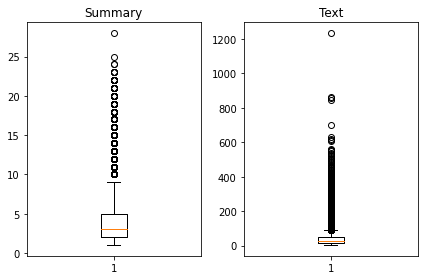

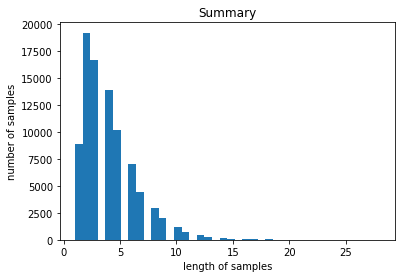

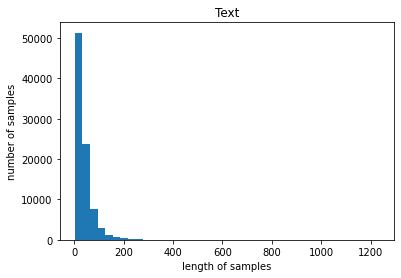

In [131]:
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [132]:
text_max_len = 50
summary_max_len = 8

In [133]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [134]:
below_threshold_len(text_max_len, data['Text'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859


In [135]:
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [136]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 65818


In [137]:
data.head()

,Text,Summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not as advertised
2,confection around centuries light pillowy citr...,delight says it all
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price wide assortment yummy ...,great taffy


In [138]:
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [139]:
encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

### **2️⃣ Text summarization task**

🔹 2-(1) Pororo - text summarization 

📌 [공식문서](https://kakaobrain.github.io/pororo/seq2seq/summary.html) 

📌 [예제 실습](https://teddylee777.github.io/machine-learning/nlp-korean-pororo) 

* PORORO : 카카오 브레인에서 제공한 자연어 처리 라이브러리

🔹 2-(2) BERT 를 이용한 text summarization 

📌 [논문 리뷰](https://medium.com/@eyfydsyd97/bert%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%9A%94%EC%95%BD-text-summary-b582b5cc7d) 

📌 [BERT Extractive summarizer Library](https://github.com/dmmiller612/bert-extractive-summarizer) 


📌 [Text summarization Github Repo](https://github.com/uoneway/Text-Summarization-Repo) 



➕ [BERT 를 이용한 뉴스 요약 자동화 App 구현 Repo](https://github.com/huydang90/News-Summarization-with-BERT) 👉 프로젝트 예시 참고 자료

